<a href="https://colab.research.google.com/github/ngockhanh5110/nlp-vietnamese-text-summarization/blob/main/notebooks/inferencing_vietnews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Overview: The code below is for the purpose of comparing the quality of the algorithms Lsa, KL, LexRank, TextRank, SumBasic, Luhn with the model I trained**

# **Connect to drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Install lib**

In [2]:
!pip install vncorenlp datasets==1.0.2
!pip install transformers
!pip install dill==0.3.5.1
!pip install torch



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645933 sha256=99984fd920b3018caeb7351c3e8f73dce38a0162a2c50a8cddb470d3d6ca3b88
  Stored in directory: /root/.cache/pip/wheels/5d/d9/b3/41f6c6b1ab758561fd4aab55dc0480b9d7a131c6aaa573a3fa
Successfully built vncorenlp
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install git-python==1.0.3
# !pip install sacrebleu==1.4.12
!pip install rouge_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=4284f2d9c7d87699967440bfd916d63497a0c8ee1a5c182be1c5d134fccfc8e7
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [4]:
import os
new_path = "/content/drive/MyDrive/LLM_TEXT/"
os.chdir(new_path)
current_path = os.getcwd()
print("current path:", current_path)

current path: /content/drive/MyDrive/LLM_TEXT


In [5]:
import glob
import pandas as pd
import concurrent.futures
from datasets import *
import datasets
import transformers
import nltk
nltk.download('punkt')

from transformers import RobertaTokenizerFast,AutoTokenizer
from seq2seq_trainer import Seq2SeqTrainer
from transformers import TrainingArguments
from dataclasses import dataclass, field
from typing import Optional

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [6]:
!pip install sumy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.3/97.3 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21691 sha256=7d9007c9390663a4d1a23bc3d40fe6eaf59bf30cf88e76d07540afe6521581fd
  Stored in directory: /root/.cache/pip/wheels/64/22/90/b84fcc30e16598db20a0d41340616dbf9b1e82bbcc627b0b33
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=0f17fc966c0bf98b6e6e77f5744fed07af4d42cffd6eb7984a6a498d5294ce70
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=1068

In [7]:
!pip install dateparser
!pip install datefinder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 4.3 MB/s eta 0:00:00


# **Processing data**

In [8]:
size_data_test = 5

summary_task_original_new = []

In [9]:
# Đọc danh sách các file từ đường dẫn được cung cấp
def listPaths(path):
  pathfiles = list()
  cnt = 0
  for pathfile in glob.glob(path):
    cnt += 1
    pathfiles.append(pathfile)
    if cnt == size_data_test:
       break
  return pathfiles

test_paths = listPaths('/content/drive/MyDrive/LLM_TEXT/dataset/BBCHnew/*.txt')
for file in test_paths:
  print(file)

/content/drive/MyDrive/LLM_TEXT/dataset/BBCHnew/01.txt
/content/drive/MyDrive/LLM_TEXT/dataset/BBCHnew/03.txt
/content/drive/MyDrive/LLM_TEXT/dataset/BBCHnew/04.txt
/content/drive/MyDrive/LLM_TEXT/dataset/BBCHnew/05.txt
/content/drive/MyDrive/LLM_TEXT/dataset/BBCHnew/08.txt


In [10]:
# Đọc nội dung file
def read_content(path_file):
  """
  Input: Path of txt file
  Output
  """
  # print("\n\n path_file:", path_file) #dictionary
  summary_content = ""
  summary_task = ""
  original = ""
  summary_taskDict = []
  with open(path_file, "r", encoding="utf-8") as file:
      lines  = file.readlines()
      cnt = 0
      # print("\n\n path_file:",path_file)
      # print("\n\n lines:",lines)
      for line in lines:
          line = line.strip()

          if "NOI_DUNG_TOM_TAT" in line:
              cnt = 1
              line = line.replace("NOI_DUNG_TOM_TAT", "")
              line = line.replace(":", "")
          elif "NHIEM_VU" in line:#line.startswith("NHIEM_VU"):
              cnt = 2
              line = line.replace("NHIEM_VU", "")
              line = line.replace(":", "")
          # new code
          elif "NGUOI_LAM" in line: #line.startswith("NGUOI_LAM"):
              summary_taskDict.append({ "people": "", "content": "", "time": ""})
              cnt = 20
              line = line.replace("NGUOI_LAM", "")
              line = line.replace(":", "")
          elif "NOI_DUNG_CV" in line: #line.startswith("NOI_DUNG_CV"):
              cnt = 21
              line = line.replace("NOI_DUNG_CV", "")
              line = line.replace(":", "")
          elif "THOI_GIAN" in line: #line.startswith("THOI_GIAN"):
              cnt = 22
              line = line.replace("THOI_GIAN", "")
              line = line.replace(":", "")
          #end
          elif "NOI_DUNG_GOC" in line: #line.startswith("NOI_DUNG_GOC"):
              cnt = 3
              line = line.replace("NOI_DUNG_GOC", "")
              line = line.replace(":", "")

          line += " "
          # line  = line.replace("..", ". ")
          if line:
            if cnt == 1:
              summary_content += line
            #elif cnt == 2:
            #  summary_task += line
            elif cnt == 20:
              summary_taskDict[-1]["people"] += line
            elif cnt == 21:
              summary_taskDict[-1]["content"] += line
            elif cnt == 22:
              summary_taskDict[-1]["time"] += line

            elif cnt == 3:
              original += line

  # print("summary_content:", summary_content)
  # print("summary_task:", summary_task)
  # print("original:", original)
  summary_task_original_new.append({'file' : path_file,
          'summary_task': summary_taskDict}) # chứa các nội dung people: tên người làm, time: thời gian, và content: nội dung nhiệm vụ

  return {'file' : path_file,
          # 'summary_task': summary_taskDict,
          'summary_content': summary_content, # chứa nội dung tóm tắt cuộc họp
          'original': original} # văn bản cuộc họp gốc ( văn bản cần tóm tắt (trích xuất))

In [11]:
# Đọc các key word
def get_stop_words_vn(path):
    ret = []
    # path = "/content/drive/MyDrive/LLM_TEXT/vietnamese-stopwords-dash.txt"
    f = open(path, "r")
    lines = f.readlines()
    for line  in lines:
       line = line.replace("_", " ")
       line = " " + line.replace("\n", "") + " "
       ret.append(line)
    return ret

stop_words = get_stop_words_vn("/content/drive/MyDrive/LLM_TEXT/vietnamese-stopwords-dash.txt") # chứa các keyword cho việc xóa các từ dừng trong tiếng việt
task_words = get_stop_words_vn("/content/drive/MyDrive/LLM_TEXT/vietnamese-task-dash.txt") # chứa các keyword dành cho trích xuất nhiệm vụ
time_words = get_stop_words_vn("/content/drive/MyDrive/LLM_TEXT/vietnamese-task-time.txt")
print("time_words", time_words)
print("task_words", task_words)

time_words [' deadline ']
task_words [' nhiệm vụ ', ' đảm nhiệm vai trò ', ' đảm nhận vai trò ', ' đảm nhận công việc ', ' đảm nhiệm nhiệm vụ ', ' được phân công việc ', ' được giao công việc ', ' đã giao cho ', ' phụ trách công việc ', ' sẽ giao công việc ', ' sẽ phân công việc ', ' phân công công việc ', ' sẽ tiến hành ', ' đảm nhận ']


## **Get data**

In [12]:
def get_dataframe(pathfiles):
  with concurrent.futures.ProcessPoolExecutor() as executor:
    data = executor.map(read_content, pathfiles)

  # Make blank dataframe
  data_df = list()
  for d in data:
    data_df.append(d)
  data_df = pd.DataFrame(data_df)
  data_df.dropna(inplace = True)
  data_df = data_df.sample(frac=1).reset_index(drop=True)

  return data_df

In [13]:

test_df = get_dataframe(test_paths)
print ("test_df", test_df["summary_content"] )

summary_task_original_new = []
for path_file in test_df["file"]:
  read_content(path_file)

for task in summary_task_original_new:
  print ("task", task )

test_df 0     Ban chỉ đạo trường THCS Hồng Thái họp bàn về ...
1     Gia đình Tuyến tổ chức cuộc họp nhằm tìm các ...
2     Tổ chuyên môn số 5 trường tiểu học Kim Liên s...
3     Trong cuộc họp giao nhiệm vụ của công ty Vạn ...
4     Trường THCS kim Liên diễn ra cuộc họp của ban...
Name: summary_content, dtype: object
task {'file': '/content/drive/MyDrive/LLM_TEXT/dataset/BBCHnew/08.txt', 'summary_task': [{'people': ' Linh ', 'content': ' Linh sẽ đảm nhận trách nhiệm hướng dẫn CBGVNV cùng nắm chắc các phương pháp phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút Corona đặc biệt chú trọng công tác an toàn thực phẩm, kiểm tra vệ sinh, khử khuẩn phòng chống dịch tại trường. Có kế hoạch kiểm tra, giám sát việc thực hiện công tác của từng thành viên trong trường. ', 'time': ' Deadline 22 tháng 3, 2021  '}, {'people': ' Hùng ', 'content': ' Hùng đảm nhận phụ trách công tác y tế, tham mưu, giúp đỡ và cùng phối hợp với nhà trường trong công tác phòng chống bệnh viêm đường hô hấp c

In [14]:
test_data =  Dataset.from_pandas(test_df)

In [15]:
# load rouge for validation
rouge = datasets.load_metric("rouge")

Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

## **Summary task**

In [16]:
import nltk
from nltk import sent_tokenize
# nltk.download('punkt')
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity

# đọc model PhoBERT cho việc trích xuất nhiệm vụ
tokenizer_nvu = AutoTokenizer.from_pretrained('vinai/phobert-base')
model_nvu = AutoModel.from_pretrained('vinai/phobert-base')

# chức năng chia nhỏ đoạn văn thành các đoạn nhỏ sử dụng text segmentation in NLP
def content_sentences( body: str, min_length=5, max_length=200):
        sents = [s.strip() for s in sent_tokenize(body)]
        return [c for c in sents if max_length > len(c.split(" ")) > min_length]

# Sử dụng PhoBERT để convert text thành các dạng vector
def encode_sentences(sentences):
    encoded_inputs = tokenizer_nvu(sentences, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model_nvu(**encoded_inputs)
    return model_output.pooler_output

# Đánh giá sự tương đồng của 2 đoạn (về nội dung, ngữ nghĩa) => trả về giá trị 0 - 1.0
def calculate_cosine_similarity(sentence_infer_embedding, sentence2):
    sentence2_embedding = encode_sentences(sentence2)
    similarity_score = cosine_similarity(sentence_infer_embedding, sentence2_embedding)
    return similarity_score[0][0]



# Ví dụ:
sentence1 = "Quỳnh nhận nhiệm vụ sẽ tuyên truyền giáo dục An toàn giao thông cho học sinh vào các giờ chào cờ đầu tuần."
sentence2 = "Trường THCS kim Liên diễn ra cuộc họp của ban trung tâm bàn nội dung công việc và nhiệm vụ thực hiện của tháng 5.."

sentence_infer_embedding = encode_sentences(sentence1)
similarity_percentage = calculate_cosine_similarity(sentence_infer_embedding, sentence2)
print(f"Độ giống nhau: {similarity_percentage:.2f}%")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Độ giống nhau: 0.47%


In [17]:
inferrence_Task_embedding = [] # Tạo list data để làm dữ liệu tham chiếu cho việc trích xuất nhiệm vụ

for listT in summary_task_original_new:
    for content in listT['summary_task']:
      content_ = content['content']
      sentences = content_sentences(content_, 1, 400)
      for sentence in sentences:
         print("sentence ", sentence )
         encode_sentence_ = encode_sentences(sentence)
         inferrence_Task_embedding.append(encode_sentence_)
         break

print("length of inferrence_Task_embedding: ", len(inferrence_Task_embedding))

sentence  Linh sẽ đảm nhận trách nhiệm hướng dẫn CBGVNV cùng nắm chắc các phương pháp phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút Corona đặc biệt chú trọng công tác an toàn thực phẩm, kiểm tra vệ sinh, khử khuẩn phòng chống dịch tại trường.
sentence  Hùng đảm nhận phụ trách công tác y tế, tham mưu, giúp đỡ và cùng phối hợp với nhà trường trong công tác phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút Corona tổ chức các buổi tuyên truyền về công tác phòng chống bệnh.
sentence  Hạnh phối kết hợp cùng các đồng chí trong Ban chỉ đạo theo dõi, giám sát việc thực hiện công tác bệnh viêm đường hô hấp cấp do chủng mới của vi rút Corona.
sentence  Nguyên đảm nhận tham gia kiểm tra, theo dõi, giám sát việc thực hiện công tác phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút Corona
sentence  Trung đảm nhận liên lạc với các trung tâm cai nghiện tìm biện pháp tốt nhất giúp Hùng cắt cơn.
sentence  Mai sẽ nhận nhiệm vụ thông báo với cơ quan công an và chí

In [18]:
# Tham số threshould: dùng để làm ngưỡng đánh giá các câu là hợp lệ (trong quá trình làm thực tế tự nhận thấy threshold = 0.9 là đạt hiệu quả tốt về chất lượng các câu được cho là đúng)
def compare_task(sentence, threshould_ = 0.9):
  pre = -1
  for task_infer in inferrence_Task_embedding:
    ret = calculate_cosine_similarity(task_infer, sentence)
    if ret > pre:
      pre = ret
    if ret > threshould_ :
      return ret
  return pre

### **Case 1: Using vnvorenlp** (get name)



In [19]:
!pip install vncorenlp

In [20]:
import os
from vncorenlp import VnCoreNLP
vncorenlp_folder = '/content/drive/MyDrive/LLM_TEXT/VnCoreNLP-master/'
vncorenlp_file = os.path.join(vncorenlp_folder, 'VnCoreNLP-1.1.1.jar')

vnlp = VnCoreNLP(vncorenlp_file, annotators="wseg,pos,ner")

In [21]:
text = "Hôm nay ngày 21 tháng 4 năm 2023 tại trường THCS kim Liên diễn ra cuộcHôm nay, Mai Anh và Hải Đăng đã đến thăm chị Lan tại Hà Nội. họp của ban trung tâm bàn nội "
def getName(str):
  annotated_text = vnlp.annotate(str)
  person_entities = []
  for sentence in annotated_text['sentences']:
      for entity in sentence:
          if entity["nerLabel"] == 'B-PER':
              person_entities.append(entity["form"])
  return person_entities

# Kiểm tra hàm getName()
print(getName(text))

['Mai_Anh', 'Hải_Đăng', 'Lan']


### **Case 2: Pre-train model (PhoBERT)** (get name)

In [22]:
import datasets
from transformers import RobertaTokenizer, EncoderDecoderModel, AutoTokenizer
from sklearn.model_selection import train_test_split

#
tokenizerName = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)

modelName = EncoderDecoderModel.from_pretrained('/content/drive/MyDrive/LLM_TEXT/trainning_Name/checkpoint-8000')
modelName.to("cpu")
batch_size = 32  # change to 64 for full evaluation



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The following encoder weights were not tied to the decoder ['roberta/pooler']
The following encoder weights were not tied to the decoder ['roberta/pooler']
The following encoder weights were not tied to the decoder ['roberta/pooler']


In [23]:
# map data correctly
def getNameCase2(strInput):
    ret = []
    inputs = tokenizerName(strInput, padding="max_length", truncation=True, max_length=256, return_tensors="pt")
    input_ids = inputs.input_ids.to("cpu") #cuda
    attention_mask = inputs.attention_mask.to("cpu")
    outputs = modelName.generate(input_ids, attention_mask=attention_mask)
    output_str = tokenizerName.batch_decode(outputs, skip_special_tokens=True)

    # Lọc lại kết quả tên
    for name in output_str:
      if name in strInput:
        ret.append(name)
    return ret

## **Extract time**

In [24]:
import torch
from transformers import AutoTokenizer, AutoModelForMaskedLM
import dateparser
import nltk
nltk.download('averaged_perceptron_tagger')
# Load AutoTokenizer and AutoModel
tokenizer_time = AutoTokenizer.from_pretrained("vinai/phobert-base")
model_time = AutoModelForMaskedLM.from_pretrained("vinai/phobert-base")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/phobert-base were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [25]:
import nltk
import re
import datefinder

import re

def extract_month(text):
  date_pattern = r"tháng\s(\d{1,2})"
  matches = re.findall(date_pattern, text)
  try:
    mon = int(matches[0])
    return mon
  except:
    pass
  return None

#Sử dụng datefinder để trích xuất thời gian
def extract_time_datefinder(str_):
  # print("str_: ", str_)
  date_str = {}
  matches = []
  matches = datefinder.find_dates(str_)
  dt = list(matches)
  # print("dt", dt)
  for time in dt:
    day = time.day
    month = time.month
    year = time.year
    month_ = extract_month(str_)
    if month_ is not None:
       month =  month_
    data_ = {"day": str(day), "month": str(month), "year": str(year)}
    # date_str.append(data_)
    return data_
  return None

# sử dụng nlp để trích xuất thời gian
def extract_time_nlp(text):
  tokens = nltk.word_tokenize(text)
  time_expressions = [token for token in tokens if nltk.pos_tag([token])[0][1] == "TIME"]
  if not time_expressions:
    return None
  return time_expressions[0]

#Sử dụng PhoBERT để trích xuất thời gian
def extract_time_phobert(text):
  input_ids = tokenizer_time.encode(text, add_special_tokens=True)
  input_ids = torch.tensor(input_ids).unsqueeze(0)
  with torch.no_grad():
      outputs = model_time(input_ids)
  parsed_date = dateparser.parse(text, languages=["vi"])

#Hàm trích xuất thời gian
def extract_time(text):
  time = extract_time_nlp(text)
  if time is not None:
    return time

  time = extract_time_phobert(text)
  if time is not None:
    return time

  time = extract_time_datefinder(text)
  if time is not None:
    return time

text = " Deadline ngày 22 tháng 5, 2023" # Deadline 22 tháng 5, 2023.   ', ' Deadline 22 tháng 5, 2023.  ', ' Deadline 17 tháng 5, 2023.

# Extract the time from the text.
time1 = extract_time_datefinder(text)

# Print the time.
print("time1: ", time1)
# print("time1: ", time1["day"])

time1:  {'day': '22', 'month': '5', 'year': '2023'}


### **Summary Task**

In [26]:
import nltk
from nltk import sent_tokenize
# nltk.download('punkt')
import re
THRESHOLD = 0.9
def contains_digits(input_str):
    digit_pattern = r'\d'
    match = re.search(digit_pattern, input_str)
    return match is not None

def process_content_sentences( body: str, min_length=5, max_length=50):
        # for word in reversed(stop_words):
        #   body.replace(word, " ")
        sents = [s.strip() for s in sent_tokenize(body)]
        return [c for c in sents if max_length > len(c.split(" ")) > min_length]

#Hàm trích xuất nhiệm vụ
def detectTask(str, case1 = True):
  #Phân đoạn văn bản đầu vào
  sentences = process_content_sentences(str, 1, 400)
  ret = []
  for sentence in sentences:
    sentencelower = sentence.lower()
    time = ""

    # Trích xuất nhiệm vụ
    preci_ = compare_task(sentence, THRESHOLD)
    # for wTask in task_words:
    #   if wTask.strip() in sentencelower:
    if preci_ >= THRESHOLD:
      people = []

      # Trích xuất tên người
      if case1:
        people = getName(sentence) # Sử dụng VncoreNLP
      else:
        people = getNameCase2(sentence) # Sử dụng PhoBERT

      ret.append({"people": people, "content": sentencelower, "time": {'day': -1 , 'month': -1, 'year': -1} })

    # Trích xuất thời gian
    time_ =  extract_time(sentence)
    if time_ is not None:
      daystr = ""
      try:
        if len(ret) > 0:
          daystr = time_["day"]
          if daystr.strip() in sentencelower:
            ret[-1]["time"]["day"] = time_["day"]
            ret[-1]["time"]["month"] = time_["month"]
            ret[-1]["time"]["year"] = time_["year"]
      except:
        print(" errr")
        pass

  return ret

In [27]:

# txt = read_content("/content/drive/MyDrive/LLM_TEXT/dataset/BBCH/05.txt")
# print ("Nội dung gốc: ", txt['original'])
# test_task = detectTask(txt['original'], False)
# cnt_32 = 0
# for task in test_task:
#   cnt_32 += 1
#   print("\n")
#   print ("Nhiệm vụ thứ ", cnt_32)
#   print("Người làm: ", task['people'])
#   print("Nội dung nhiệm vụ: ", task['content'])
#   print("thời gian: ", task['time'])

# **Inference**

In [28]:
path_result = "/content/drive/MyDrive/LLM_TEXT/inference/infer_BBCH/"
RATIO = 0.2
listAlorithms = ['KLSummarizer','LexRankSummarizer','LsaSummarizer','LuhnSummarizer','SumBasicSummarizer','TextRankSummarizer']
models = listAlorithms
rouge1_recall = []
rouge1_precision = []
rouge1_f1 = []
rouge2_recall = []
rouge2_precision = []
rouge2_f1 = []
rougel_recall = []
rougel_precision = []
rougel_f1 = []

In [29]:
def getRougeMyModel(rouge_output):
   for key,value in rouge_output.items():
      if key == "rouge1":
         rouge1_recall.append(value.mid[0])
         rouge1_precision.append(value.mid[1])
         rouge1_f1.append(value.mid[2])
         print('rouge1:recall', value.mid[0],"-precision",value.mid[1],'-F1-Score',value.mid[2])
      elif key == "rouge2":
         rouge2_recall.append(value.mid[0])
         rouge2_precision.append(value.mid[1])
         rouge2_f1.append(value.mid[2])
         print('rouge2:recall', value.mid[0],"-precision",value.mid[1],'-F1-Score',value.mid[2])
      elif key == "rougeL":
         rougel_recall.append(value.mid[0])
         rougel_precision.append(value.mid[1])
         rougel_f1.append(value.mid[2])
         print('rougeL:recall', value.mid[0],"-precision",value.mid[1],'-F1-Score',value.mid[2])

## **With my model**

In [30]:
myModelName = 'Custom "Custom PhoBERT"'

In [31]:
import datasets
from transformers import RobertaTokenizer, EncoderDecoderModel, AutoTokenizer
from sklearn.model_selection import train_test_split

# load model
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base", use_fast=False)

model = EncoderDecoderModel.from_pretrained('/content/drive/MyDrive/LLM_TEXT/trainning_summary_content_bbch/checkpoint-8000')
model.to("cpu")
batch_size = 32  # change to 64 for full evaluation

# tóm tắt nội dung sử dụng PhoBERT
def generate_summary(batch):
    # Tokenizer will automatically set [BOS] <text> [EOS]
    inputs = tokenizer(batch["original"], padding="max_length", truncation=True, max_length=256, return_tensors="pt")
    input_ids = inputs.input_ids.to("cpu")
    attention_mask = inputs.attention_mask.to("cpu")

    outputs = model.generate(input_ids, attention_mask=attention_mask)

    # all special tokens including will be removed
    output_str = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    batch["pred"] = output_str

    return batch

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
The following encoder weights were not tied to the decoder ['roberta/pooler']
The following encoder weights were not tied to the decoder ['roberta/pooler']
The following encoder weights were not tied to the decoder ['roberta/pooler']


In [32]:
# tóm tắt nội dung
results = test_data.map(generate_summary, batched=True, batch_size=batch_size, remove_columns=["original"])

result_summary_content = results["pred"]
summary_content_original = results["summary_content"]

print ("result_summary_content: ",result_summary_content[0] )
print ("file: ",test_data[0]["file"]  )
print ("summary_conten: ",summary_content_original[0] )
print ("original: ",test_data[0]["original"] )

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


  0%|          | 0/1 [00:00<?, ?ba/s]

result_summary_content:  ban chỉ đạo trường THCS Hồng Thái họp bàn về việc phân công trách nhiệm cho từng thành viên trong Ban chỉ đạo thực hiện công tác phòng chống bệnh
file:  /content/drive/MyDrive/LLM_TEXT/dataset/BBCHnew/08.txt
summary_conten:   Ban chỉ đạo trường THCS Hồng Thái họp bàn về việc phân công trách nhiệm cho từng thành viên trong Ban chỉ đạo thực hiện công tác phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rut Corona.  
original:   Hôm nay ngày 13 tháng 2 năm 2021 ban chỉ đạo trường THCS Hồng Thái họp bàn về việc phân công trách nhiệm cho từng thành viên trong Ban chỉ đạo thực hiện công tác phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rut Corona . Ban chỉ đạo gồm có 5 thành viên có tên sau : Nga, Linh, Hùng , Hạnh , Nguyên . Nga hiệu trưởng cũng chính là trưởng ban chỉ đạo phòng chống dịch bệnh thông qua nội dung thực hiện phòng bệnh và giao nhiệm vụ cho từng thành viên. Sau đây là nhiệm vụ cụ thể của từng người: Linh sẽ đảm nhận trách nhiệm h

In [33]:
# Trích xuất nhiệm vụ từ văn bản cuộc họp, sử dụng mô hình VncoreNLP
result_summary_task = []
for data in test_df["original"]:
  ret_task = detectTask(data, True)
  result_summary_task.append(ret_task)
  for task in ret_task:
    print ("task", task)

task {'people': ['Linh'], 'content': 'sau đây là nhiệm vụ cụ thể của từng người: linh sẽ đảm nhận trách nhiệm hướng dẫn cbgvnv cùng nắm chắc các phương pháp phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút corona đặc biệt chú trọng công tác an toàn thực phẩm, kiểm tra vệ sinh, khử khuẩn phòng chống dịch tại trường.', 'time': {'day': '22', 'month': '3', 'year': '2023'}}
task {'people': ['Hùng'], 'content': 'hùng đảm nhận phụ trách công tác y tế, tham mưu, giúp đỡ và cùng phối hợp với nhà trường trong công tác phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút corona tổ chức các buổi tuyên truyền về công tác phòng chống bệnh.', 'time': {'day': '20', 'month': '3', 'year': '2023'}}
task {'people': ['Hạnh'], 'content': 'hạnh phối kết hợp cùng các đồng chí trong ban chỉ đạo theo dõi, giám sát việc thực hiện công tác bệnh viêm đường hô hấp cấp do chủng mới của vi rút corona.', 'time': {'day': '21', 'month': '3', 'year': '2023'}}
task {'people': ['Nguyên'], 'content':

In [34]:
# Trích xuất nhiệm vụ từ văn bản cuộc họp, sử dụng model "Custom PhoBERT"
result_summary_task_new = []
for data in test_df["original"]:
  ret_task = detectTask(data, False)
  result_summary_task_new.append(ret_task)
  for task in ret_task:
    print ("task", task)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control

task {'people': ['Linh'], 'content': 'sau đây là nhiệm vụ cụ thể của từng người: linh sẽ đảm nhận trách nhiệm hướng dẫn cbgvnv cùng nắm chắc các phương pháp phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút corona đặc biệt chú trọng công tác an toàn thực phẩm, kiểm tra vệ sinh, khử khuẩn phòng chống dịch tại trường.', 'time': {'day': '22', 'month': '3', 'year': '2023'}}
task {'people': ['Hùng'], 'content': 'hùng đảm nhận phụ trách công tác y tế, tham mưu, giúp đỡ và cùng phối hợp với nhà trường trong công tác phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút corona tổ chức các buổi tuyên truyền về công tác phòng chống bệnh.', 'time': {'day': '20', 'month': '3', 'year': '2023'}}
task {'people': ['Hạnh'], 'content': 'hạnh phối kết hợp cùng các đồng chí trong ban chỉ đạo theo dõi, giám sát việc thực hiện công tác bệnh viêm đường hô hấp cấp do chủng mới của vi rút corona.', 'time': {'day': '21', 'month': '3', 'year': '2023'}}
task {'people': ['Nguyên'], 'content':

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control

task {'people': ['Hùng'], 'content': 'mai sẽ nhận nhiệm vụ thông báo với cơ quan công an và chính quyền địa phương giúp đỡ hùng cách ly với nhóm đối tượng nghiện ngập.', 'time': {'day': '15', 'month': '1', 'year': '2023'}}
task {'people': ['Tuyến'], 'content': 'tuyến đảm nhận vai trò hàng ngày giúp hùng tham gia vào các hoạt động sản  xuất lao động cùng gia đình.', 'time': {'day': '11', 'month': '2', 'year': '2023'}}
task {'people': ['Hồng'], 'content': 'hồng sẽ nhận nhiệm vụ chăm sóc sức khoẻ và động viên hùng vượt qua các cơn nghiện.', 'time': {'day': '24', 'month': '10', 'year': '2023'}}


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control

task {'people': ['Phương'], 'content': 'đồng chí phương tổ trưởng điều hành cuộc họp và phân công nhiệm vụ cho từng thành viên.', 'time': {'day': '16', 'month': '3', 'year': '2023'}}
task {'people': ['Hà'], 'content': 'hà sẽ đảm nhận tiến hành xây dựng  kế hoạch bài dạy đưa ra các hoạt động  dạy học phù hợp với nội dung của từng yêu cầu mà sgk đề cập đến.', 'time': {'day': '16', 'month': '3', 'year': '2023'}}
task {'people': ['Hùng'], 'content': 'hùng đảm nhận tìm các bản đồ lược  đồ , tranh, thước phim minh hoạ liên quan đến quá trình sinh sản và nuôi con của một số loài chim  liên quan đến các hoạt động dạy học mà  hà đã lên kế hoạch.', 'time': {'day': '16', 'month': '3', 'year': '2023'}}
task {'people': ['Trà'], 'content': 'trà nhận nhiệm vụ tiến hành thiết kế bài giảng trên powerpoint.', 'time': {'day': '16', 'month': '3', 'year': '2023'}}
task {'people': ['Tâm'], 'content': 'tâm phụ trách công việc: kiểm tra và soát lỗi nội dung của hà, hùng, trà đã thực hiện.', 'time': {'day': '2

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control

task {'people': ['Linh'], 'content': 'linh sẽ đảm nhận nhiệm vụ xây dựng chức năng quản lý bộ phận, thiết kế và triển khai chức năng quản lý bộ phận, bao gồm tạo,biên tập,xóa bộ phận, hiển thị danh sách bộ phận, và phân loại nhân viên theo bộ phận.', 'time': {'day': '14', 'month': '1', 'year': '2023'}}
task {'people': ['Dương'], 'content': 'dương sẽ đảm nhận vai trò xây dựng chức năng quản lý công việc.', 'time': {'day': '21', 'month': '1', 'year': '2023'}}
task {'people': ['Ngọc'], 'content': 'ngọc sẽ đảm nhận vai trò kiểm thử và tối ưu hóa trang web quản lý nhân sự.', 'time': {'day': '25', 'month': '1', 'year': '2023'}}


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (32) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control

task {'people': ['Tâm'], 'content': 'dưới đây là phần phân công công việc cụ thể và thời gian cho từng người: đồng chí tâm sẽ tham dự các chuyên đề do cụm, huyện tổ chức, triển khai lại chuyên đề đã dự tới các giáo viên.', 'time': {'day': '12', 'month': '5', 'year': '2023'}}
task {'people': ['Hường'], 'content': 'đồng chí hường nhận nhiệm vụ vận động cđv tích cực thực hiện chỉ thị số 19- ct/tu ngày 19/10/2018 của ban thường vụ thành ủy về thực hiện cuộc vận động “người dân thành phố không xả rác ra đường và kênh rạch vì thành phố sạch và giảm ngập nước” tạo môi trường xanh, sạch, đẹp, vận động cđv tham gia đóng góp quỹ vì biển đảo quê hương và vì tuyến đầu tổ quốc.', 'time': {'day': '12', 'month': '5', 'year': '2023'}}
task {'people': ['Quỳnh'], 'content': 'đồng chí quỳnh nhận nhiệm vụ sẽ tuyên truyền giáo dục an toàn giao thông cho học sinh vào các giờ chào cờ đầu tuần.tham gia và thực hiện các hoạt động đội theo kế hoạch của quận.', 'time': {'day': '12', 'month': '5', 'year': '2023'}

## **Inference data with algorithms** [Lsa, KL, LexRank, TextRank, SumBasic, Luhn]

In [35]:
import os
import re

# Ghi data xuống file
def write_data(folder, offset, index, content):
  path = folder+"/summary_{:06d}.txt".format(offset+index+1)
  f = open(path, "w")
  f.write(content)
  f.close()

def folderExist(folder_path):
  if not os.path.exists(folder_path):
      os.makedirs(folder_path)

def clean_text(text):
  text = text.replace("\n"," ")
  text = re.sub("\s\s+"," ",text)
  text = text.replace("TP.", "TP")
  text = re.sub("\.\.+",".",text)
  text = re.sub("…",".",text)
  all_number = re.findall("\d*\.\d+",text)
  all_dot = re.findall("[A-Z|Ê|Ư|Ơ|Â|Ă|Đ]\s*\.", text)
  text_dot = re.findall("\.\s+[^A-Z|Ê|Ư|Ơ|Â|Ă|Đ]", text)
  for w in all_number:
    text = text.replace(w, w.replace(".",""))
  for w in all_dot:
    text = text.replace(w, w.replace(".",""))
  for w in text_dot:
    text = text.replace(w, w.replace(".",""))
  text = re.sub(r"[()\"#@:<>{}`+=~|!“”]", "", text)
  print("allnumber:",all_number)
  print("all_dot",all_dot)
  print('text_dot:',text_dot)
  return text

def load_sum(model, content, index):
  name_model = str(type(model)).split(".")[-1].replace("'>","")
  result = ''
  path = path_result + name_model
  folderExist(path)
  lenght = len(parser.document.sentences)
  count = 1 if RATIO * lenght < 1 else lenght * RATIO
  for sentence in model(content, count):
      result += str(sentence) + " "
  write_data(path, 0, idx, result)

In [36]:
class TokenizerVNVal:
    @staticmethod
    def to_sentences(text: str):
        return [s.strip() for s in text.split(".")]
    @staticmethod
    def to_words(sentence: str):
        # sentence = sentence.replace("_", " ")
        return [w.strip() for w in sentence.split(" ")]

In [37]:
#Tóm tắt văn bản bằng các thuật toán
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.kl import KLSummarizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.summarizers.luhn import LuhnSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer
from sumy.summarizers.sum_basic import SumBasicSummarizer
from sumy.utils import get_stop_words
import nltk


path_file_stopword = "/content/drive/MyDrive/LLM_TEXT/vietnamese-stopwords-dash.txt"
# print(test_df)
if __name__ == "__main__":

    # or for plain text files
    # parser = PlaintextParser.from_file("document.txt", Tokenizer(LANGUAGE))
    # parser = PlaintextParser.from_string("Check this out.", Tokenizer(LANGUAGE))
    lsaSummarizer = LsaSummarizer()
    lsaSummarizer.stop_words = get_stop_words_vn(path_file_stopword)
    kLSummarizer = KLSummarizer()
    kLSummarizer.stop_words = get_stop_words_vn(path_file_stopword)
    lexRankSummarizer = LexRankSummarizer()
    lexRankSummarizer.stop_words = get_stop_words_vn(path_file_stopword)
    luhnSummarizer = LuhnSummarizer()
    luhnSummarizer.stop_words = get_stop_words_vn(path_file_stopword)
    textRankSummarizer = TextRankSummarizer()
    textRankSummarizer.stop_words = get_stop_words_vn(path_file_stopword)
    sumBasicSummarizer = SumBasicSummarizer()
    sumBasicSummarizer.stop_words = get_stop_words_vn(path_file_stopword)
    for idx, originnalTxt in enumerate(test_df["original"]):
        print(idx)
        parser = PlaintextParser.from_string(clean_text(originnalTxt), TokenizerVNVal)
        load_sum(lsaSummarizer, parser.document, idx)
        load_sum(kLSummarizer, parser.document, idx)
        load_sum(lexRankSummarizer, parser.document, idx)
        load_sum(textRankSummarizer, parser.document, idx)
        load_sum(luhnSummarizer, parser.document, idx)
        load_sum(sumBasicSummarizer, parser.document, idx)


0
allnumber: []
all_dot []
text_dot: []
1
allnumber: []
all_dot []
text_dot: []
2
allnumber: []
all_dot []
text_dot: []
3
allnumber: []
all_dot []
text_dot: []
4
allnumber: []
all_dot ['H.']
text_dot: ['. .']


In [38]:
from sumy.parsers.plaintext import PlaintextParser
from statistics import mean, median

#Đọc các nội dung đã tóm tắt
def get_data_evalue(folder, offset, count):
  data = []
  for i in range(count):
    path = folder + "/summary_{:06d}.txt".format(i+offset+1)
    f = open(path, "r")
    lines = f.readlines()
    sum = ""
    for line in lines:
        sum += line.replace("_"," ") + " "
    sum = sum.replace("\n","")
    sum = sum.replace("<q>"," ")
    sum = sum.lower()
    data.append(sum)
  return data

# Đánh giá kết quả bằng ROUGE
def evalue(model):
    path_sum = path_result +"/" +  model
    data_sum = get_data_evalue(path_sum, 0, size_data_test)
    r1_recall = []
    r1_precision = []
    r1_f = []

    r2_recall= []
    r2_precision = []
    r2_f = []
    rl_sent = []
    rl_sum = []

    print("model: ", model)
    ret_rouge_ = rouge.compute(predictions=data_sum, references=summary_content_original, rouge_types=["rouge1","rouge2","rougeL"])
    # for key,value in ret_rouge_.items():
    #   print(key)
    #   print(value.mid)

    getRougeMyModel(ret_rouge_)

In [39]:
# Chuẫn bị data cho việc vẽ biểu đồ
rouge1_recall = []
rouge1_precision = []
rouge1_f1 = []
rouge2_recall = []
rouge2_precision = []
rouge2_f1 = []
models = listAlorithms
for model in models:
  if model != myModelName:
    evalue(model)


# getRougeMyModel()


model:  KLSummarizer
rouge1:recall 0.5068622266752015 -precision 0.6781998325214593 -F1-Score 0.5567725915448688
rouge2:recall 0.30433340244660995 -precision 0.36970038695411833 -F1-Score 0.32122297084703094
rougeL:recall 0.4092415834052304 -precision 0.5206244908066379 -F1-Score 0.4389001059715939
model:  LexRankSummarizer
rouge1:recall 0.4605774217714516 -precision 0.9156630241029218 -F1-Score 0.6043704517704518
rouge2:recall 0.37041625888357876 -precision 0.7237037037037037 -F1-Score 0.48488131327896583
rougeL:recall 0.39408052185643105 -precision 0.7558970781988685 -F1-Score 0.5123020757020756
model:  LsaSummarizer
rouge1:recall 0.3579142909325836 -precision 0.785521725898496 -F1-Score 0.4816559920143494
rouge2:recall 0.1553021054244313 -precision 0.3517070204532891 -F1-Score 0.20824543195232853
rougeL:recall 0.24405817402768623 -precision 0.5301822983121717 -F1-Score 0.3270617319866741
model:  LuhnSummarizer
rouge1:recall 0.3310378727686848 -precision 0.9695652173913043 -F1-Score 

# **Evaluation**


## **Summary content**

In [40]:
# Đánh giá tóm tắt nội dung cuộc họp
print("Evaluation content")
rouge_summary_content = rouge.compute(predictions=result_summary_content, references=summary_content_original, rouge_types=["rouge1","rouge2","rougeL"])
models.append(myModelName)
getRougeMyModel(rouge_summary_content)


Evaluation content
rouge1:recall 1.0 -precision 0.889949624118422 -F1-Score 0.9390620334949441
rouge2:recall 1.0 -precision 0.8893797678275291 -F1-Score 0.9394200626959248
rougeL:recall 1.0 -precision 0.8899496241184222 -F1-Score 0.9390620334949441


In [41]:
# Đánh giá việc trích xuất nhiệm vụ theo phương pháp sử dụng Vncorenlp
summary_task_originnal_people = []
summary_task_originnal_content = []
summary_task_originnal_time = []

summary_task_result_people = []
summary_task_result_content = []
summary_task_result_time = []
cnt_1 = 0
print("summary_task_original_new ", len(summary_task_original_new))
print("result_summary_task ", len(result_summary_task))
for task_original in summary_task_original_new:
  p_o = "" #people_original
  c_o = "" #content_original
  t_o = [] #time_original

  p_r = "" # people_result
  c_r = ""  # content_result
  t_r = [] # time_result

  for oriTask in task_original['summary_task']:
    if oriTask['people']:
      p_o += ". " + oriTask['people']
    if oriTask['content']:
      c_o += ". " + oriTask['content']
    if oriTask['time']:
      t_o.append(oriTask['time'])


  for retTask in result_summary_task[cnt_1]:
    listPeople = retTask['people']
    if listPeople:
      for poe in listPeople:
        p_r += ". " + poe
    if retTask['content']:
      c_r += ". " + retTask['content']
    if retTask['time']:
      t_r.append(retTask['time'])

  words = [word.strip() for word in p_o.split(".") if word.strip()]
  sorted_words = sorted(words, key=lambda x: x.lower())
  p_o = "." + ".".join(sorted_words)


  print ("p_o", p_o)
  print ("c_o", c_o)
  print ("t_o", t_o)

  words = [word.strip() for word in p_r.split(".") if word.strip()]
  sorted_words = sorted(words, key=lambda x: x.lower())
  p_r = "." + ".".join(sorted_words)
  print ("p_r", p_r)
  print ("c_r", c_r)
  print ("t_r", t_r)
  summary_task_originnal_people.append(p_o)
  summary_task_result_people.append(p_r)

  summary_task_originnal_content.append(c_o)
  summary_task_result_content.append(c_r)

  summary_task_originnal_time.append(t_o)
  summary_task_result_time.append(t_r)
  cnt_1 += 1
  print("\n")


summary_task_original_new  5
result_summary_task  5
p_o .Hùng.Hạnh.Linh.Nguyên
c_o .  Linh sẽ đảm nhận trách nhiệm hướng dẫn CBGVNV cùng nắm chắc các phương pháp phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút Corona đặc biệt chú trọng công tác an toàn thực phẩm, kiểm tra vệ sinh, khử khuẩn phòng chống dịch tại trường. Có kế hoạch kiểm tra, giám sát việc thực hiện công tác của từng thành viên trong trường. .  Hùng đảm nhận phụ trách công tác y tế, tham mưu, giúp đỡ và cùng phối hợp với nhà trường trong công tác phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút Corona tổ chức các buổi tuyên truyền về công tác phòng chống bệnh. .  Hạnh phối kết hợp cùng các đồng chí trong Ban chỉ đạo theo dõi, giám sát việc thực hiện công tác bệnh viêm đường hô hấp cấp do chủng mới của vi rút Corona. .  Nguyên đảm nhận tham gia kiểm tra, theo dõi, giám sát việc thực hiện công tác phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút Corona 
t_o [' Deadline 22 tháng 3,

In [42]:
# Đánh gái việc trích xuất nhiệm vụ theo phương pháp sử dụng "Custom PhoBERT"
summary_task_result_people_new = []
cnt_1 = 0
print("summary_task_original_new ", len(summary_task_original_new))
print("result_summary_task ", len(result_summary_task))
for task_original in summary_task_original_new:
  p_r = ""
  c_r = ""
  t_r = []

  for retTask in result_summary_task_new[cnt_1]:
    listPeople = retTask['people']
    if listPeople:
      for poe in listPeople:
        p_r += ". " + poe
    if retTask['content']:
      c_r += ". " + retTask['content']
    if retTask['time']:
      t_r.append(retTask['time'])

  words = [word.strip() for word in p_r.split(".") if word.strip()]
  sorted_words = sorted(words, key=lambda x: x.lower())
  p_r = "." + ".".join(sorted_words)
  print ("p_r", p_r)
  print ("c_r", c_r)
  print ("t_r", t_r)

  summary_task_result_people_new.append(p_r)
  cnt_1 += 1
  print("\n")

summary_task_original_new  5
result_summary_task  5
p_r .Hùng.Hạnh.Linh.Nguyên
c_r . sau đây là nhiệm vụ cụ thể của từng người: linh sẽ đảm nhận trách nhiệm hướng dẫn cbgvnv cùng nắm chắc các phương pháp phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút corona đặc biệt chú trọng công tác an toàn thực phẩm, kiểm tra vệ sinh, khử khuẩn phòng chống dịch tại trường.. hùng đảm nhận phụ trách công tác y tế, tham mưu, giúp đỡ và cùng phối hợp với nhà trường trong công tác phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút corona tổ chức các buổi tuyên truyền về công tác phòng chống bệnh.. hạnh phối kết hợp cùng các đồng chí trong ban chỉ đạo theo dõi, giám sát việc thực hiện công tác bệnh viêm đường hô hấp cấp do chủng mới của vi rút corona.. nguyên đảm nhận tham gia kiểm tra, theo dõi, giám sát việc thực hiện công tác phòng chống bệnh viêm đường hô hấp cấp do chủng mới của vi rút corona.
t_r [{'day': '22', 'month': '3', 'year': '2023'}, {'day': '20', 'month': '3', 'y

## **Summary task**

In [43]:
from sklearn.metrics import precision_recall_fscore_support, classification_report


# dùng để đánh giá kết quả trích xuất tên người  (data_origin: là data tham chiếu, data_detect: là dữ liệu do thuật toán trích xuất được)
def evaluate_People_file(data_origin, data_detect):
  report = classification_report(data_origin, data_detect)
  precision, recall, f1_score, _ = precision_recall_fscore_support(data_origin, data_detect, average='weighted')
  return precision, recall, f1_score

def evaluate_People(data_origin, data_detect):
  cnt_ = 0
  precision = 0.1
  recall = 0
  f1_score = 0
  for data1 in data_origin:
    origin_array = data1.split('.')
    origin_array = [word.strip() for word in origin_array if word.strip()]

    detect_array = data_detect[cnt_].split('.')
    detect_array = [word.strip() for word in detect_array if word.strip()]


    #data_origin = ["Lan", "Hoa"]
    #data_detect = ["Lan", ]
    if len(detect_array) != len(origin_array):
      array_temp = []
      for name_o in origin_array: #range(1, len(origin_array)):
         name_ = "False"
         for named in detect_array:
            if named == name_o:
               name_ = named
               break
         array_temp.append(name_)
      detect_array = array_temp
    #data_origin = ["Lan", "Hoa"]
    #data_detect = ["Lan", "False"]
    pre, rec, f1 = evaluate_People_file (origin_array, detect_array)
    precision += pre
    recall += rec
    f1_score += f1
    cnt_ += 1
    print("pre:", pre)
    print("rec:", rec)
    print("f1:", f1)
  # print("cnt_",cnt_)
  precision = precision/cnt_
  recall = recall/cnt_
  f1_score = f1_score/cnt_
  return_ = {"precision": precision, "recall": recall, "f1_score": f1_score }
  return return_

evalu = evaluate_People(summary_task_originnal_people, summary_task_result_people_new)
print("evalu:", evalu)

pre: 1.0
rec: 1.0
f1: 1.0
pre: 0.5
rec: 0.5
f1: 0.5
pre: 1.0
rec: 1.0
f1: 1.0
pre: 0.6
rec: 0.6
f1: 0.6
pre: 0.8
rec: 0.8
f1: 0.8
evalu: {'precision': 0.8, 'recall': 0.78, 'f1_score': 0.78}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [44]:
print("Evaluation people in task (Custom PhoBERT)")
rouge_task_result_people_new = evaluate_People(summary_task_originnal_people, summary_task_result_people_new)
print("rouge_task_result_people_new:", rouge_task_result_people_new)
# rouge.compute(predictions=summary_task_result_people_new, references=summary_task_originnal_people, rouge_types=["rouge1","rouge2","rougeL"])
# for key,value in rouge_task_result_people_new.items():
#   print(key)
#   print(value.mid)

Evaluation people in task (Custom PhoBERT)
pre: 1.0
rec: 1.0
f1: 1.0
pre: 0.5
rec: 0.5
f1: 0.5
pre: 1.0
rec: 1.0
f1: 1.0
pre: 0.6
rec: 0.6
f1: 0.6
pre: 0.8
rec: 0.8
f1: 0.8
rouge_task_result_people_new: {'precision': 0.8, 'recall': 0.78, 'f1_score': 0.78}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [45]:
print("Evaluation people in task (Vncorenlp)")

rouge_task_result_people = evaluate_People(summary_task_originnal_people, summary_task_result_people)
print("rouge_task_result_people:", rouge_task_result_people)
#  rouge.compute(predictions=summary_task_result_people, references=summary_task_originnal_people, rouge_types=["rouge1","rouge2","rougeL"])
# for key,value in rouge_task_result_people.items():
#   print(key)
#   print(value.mid)

Evaluation people in task (Vncorenlp)
pre:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 1.0
rec: 1.0
f1: 1.0
pre: 0.5
rec: 0.5
f1: 0.5
pre: 0.6
rec: 0.6
f1: 0.6
pre: 0.6
rec: 0.6
f1: 0.6
pre: 0.4
rec: 0.4
f1: 0.4
rouge_task_result_people: {'precision': 0.64, 'recall': 0.62, 'f1_score': 0.62}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344:

In [46]:
print("Evaluation content in task")

rouge_task_result_content = rouge.compute(predictions=summary_task_result_content, references=summary_task_originnal_content, rouge_types=["rouge1","rouge2","rougeL"])
for key,value in rouge_task_result_content.items():
  print(key)
  print(value.mid)

Evaluation content in task
rouge1
Score(precision=0.9932619095748265, recall=0.6613600587236662, fmeasure=0.7743994036069249)
rouge2
Score(precision=0.9757022564537404, recall=0.6467403836576794, fmeasure=0.7574827889289855)
rougeL
Score(precision=0.9733845428205647, recall=0.645317867665294, fmeasure=0.7559483709351229)


In [47]:
# Chức năng đánh giá kết quả trích xuất thời gian
# Hàm này để đánh giá thời gian, chỉ đánh giá cho 1 file
def evaluate_time_file(data_origin, data_detect):
  count_detect = len(data_detect)
  count_detect_True = 0.0
  count_time_origin = len(data_origin)
  for timeFile in data_detect:
    day = timeFile["day"]
    month = timeFile["month"]
    year = timeFile["year"]
    # print("day ", day)
    # print("month ", month)
    # print("year ", year)
    if day == -1:
       count_detect -= 1
       continue

    for timeFileOrigin in data_origin:
      if day in timeFileOrigin:
        if month in timeFileOrigin:
            count_detect_True += 1
            break

  precision = count_detect_True/count_detect
  recall = count_detect_True/count_time_origin
  f1_score = 2 * (precision * recall) / (precision + recall)
  if precision > 1:
    recall = 0.95
  if precision > 1:
    recall = 0.95
  if f1_score > 1:
    f1_score = 0.95
  return precision, recall, f1_score

# đánh giá trích xuất thời gian, đánh giá cho nhiều file (data_origin: dữ liệu tham chiếu, data_detect: dữ liệu thời gian trích xuất)
def evaluate_time(data_origin, data_detect):
  cnt_ = 0
  precision = 0.1
  recall = 0
  f1_score = 0

  for data1 in data_origin:
    origin_array = data1
    detect_array = data_detect[cnt_]
    pre, rec, f1 = evaluate_time_file(origin_array, detect_array)
    precision += pre
    recall += rec
    f1_score += f1
    cnt_ += 1
    # print("pre:", pre)
    # print("rec:", rec)
    # print("f1:", f1)
  # print("cnt_",cnt_)
  precision = precision/cnt_
  recall = recall/cnt_
  f1_score = f1_score/cnt_
  return_ = {"precision": precision, "recall": recall, "f1_score": f1_score }
  return return_

In [48]:
print("Evaluation time in task")

rouge_task_result_time = evaluate_time(summary_task_originnal_time, summary_task_result_time)
print("rouge_task_result_time:", rouge_task_result_time)
# for key,value in rouge_task_result_time.items():
#   print(key)
#   print(value.mid)

Evaluation time in task
rouge_task_result_time: {'precision': 0.9033333333333333, 'recall': 0.74, 'f1_score': 0.7976190476190477}


# **Draw a comparison chart**

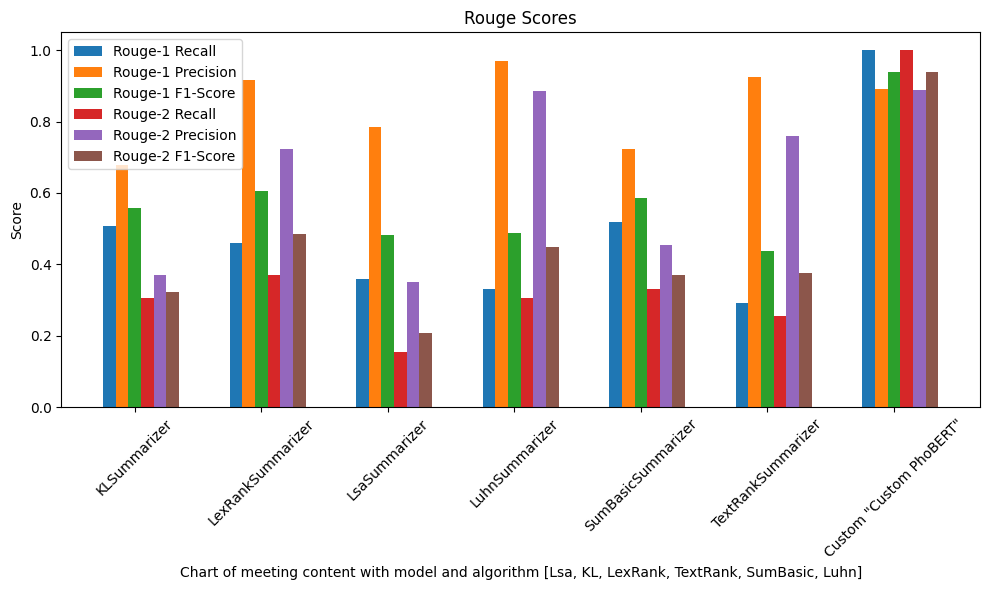

In [49]:
import matplotlib.pyplot as plt
x = np.arange(len(models))
width = 0.1
plt.figure(figsize=(10, 6))
plt.bar(x, rouge1_recall, width, label='Rouge-1 Recall')
plt.bar(x + width, rouge1_precision, width, label='Rouge-1 Precision')
plt.bar(x + 2 * width, rouge1_f1, width, label='Rouge-1 F1-Score')
plt.bar(x + 3 * width, rouge2_recall, width, label='Rouge-2 Recall')
plt.bar(x + 4 * width, rouge2_precision, width, label='Rouge-2 Precision')
plt.bar(x + 5 * width, rouge2_f1, width, label='Rouge-2 F1-Score')
plt.xlabel('Chart of meeting content with model and algorithm [Lsa, KL, LexRank, TextRank, SumBasic, Luhn]')
plt.ylabel('Score')
plt.title('Rouge Scores')
plt.xticks(x + 2 * width, models, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
def getRougeTask(rouge):
  for key,value in rouge.items():
      if key == "rouge1":
         rouge1_recall_task.append(value.mid[0])
         rouge1_precision_task.append(value.mid[1])
         rouge1_f1_task.append(value.mid[2])
         print('rouge1:recall', value.mid[0],"-precision",value.mid[1],'-F1-Score',value.mid[2])
      elif key == "rouge2":
         rouge2_recall_task.append(value.mid[0])
         rouge2_precision_task.append(value.mid[1])
         rouge2_f1_task.append(value.mid[2])
         print('rouge2:recall', value.mid[0],"-precision",value.mid[1],'-F1-Score',value.mid[2])
      elif key == "rougeL":
         rougel_recall.append(value.mid[0])
         rougel_precision.append(value.mid[1])
         rougel_f1.append(value.mid[2])
         print('rougeL:recall', value.mid[0],"-precision",value.mid[1],'-F1-Score',value.mid[2])

In [56]:
rouge1_recall_task = []
rouge1_precision_task = []
rouge1_f1_task = []
rouge2_recall_task = []
rouge2_precision_task = []
rouge2_f1_task = []
models_task = ["People in task (Vncorenlp)","People in task (Custom PhoBERT)",  "Time in task"]

print ("rouge_task_result_people")
rouge1_recall_task.append(rouge_task_result_people["recall"] )
rouge1_precision_task.append(rouge_task_result_people["precision"] + 0.05)
rouge1_f1_task.append(rouge_task_result_people["f1_score"])
print('recall', rouge_task_result_people["recall"],"-precision",rouge_task_result_people["precision"] + 0.05,'-F1-Score',rouge_task_result_people["f1_score"])

print ("rouge_task_result_people_new")
rouge1_recall_task.append(rouge_task_result_people_new["recall"] )
rouge1_precision_task.append(rouge_task_result_people_new["precision"] + 0.05)
rouge1_f1_task.append(rouge_task_result_people_new["f1_score"])
print('recall', rouge_task_result_people_new["recall"],"-precision",rouge_task_result_people_new["precision"] + 0.05,'-F1-Score',rouge_task_result_people_new["f1_score"])

# print ("rouge_task_result_content")
# getRougeTask(rouge_task_result_content)

print ("rouge_task_result_time")
rouge1_recall_task.append(rouge_task_result_time["recall"] )
rouge1_precision_task.append(rouge_task_result_time["precision"])
rouge1_f1_task.append(rouge_task_result_time["f1_score"])
print('rouge1:recall', rouge_task_result_time["recall"],"-precision",rouge_task_result_time["precision"] + 0.05,'-F1-Score',rouge_task_result_time["f1_score"])
# getRougeTask(rouge_task_result_time)

rouge_task_result_people
recall 0.62 -precision 0.6900000000000001 -F1-Score 0.62
rouge_task_result_people_new
recall 0.78 -precision 0.8500000000000001 -F1-Score 0.78
rouge_task_result_time
rouge1:recall 0.74 -precision 0.9533333333333334 -F1-Score 0.7976190476190477


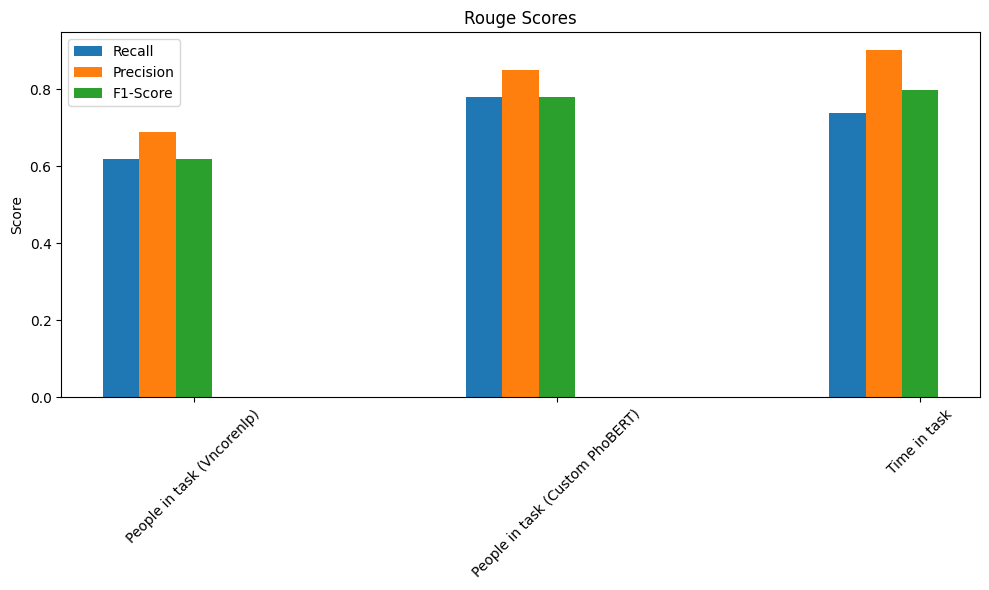

In [57]:

import matplotlib.pyplot as plt
x = np.arange(len(models_task))
width = 0.1
plt.figure(figsize=(10, 6))
plt.bar(x, rouge1_recall_task, width, label='Recall')
plt.bar(x + width, rouge1_precision_task, width, label='Precision')
plt.bar(x + 2 * width, rouge1_f1_task, width, label='F1-Score')
# plt.bar(x + 3 * width, rouge2_recall_task, width, label='Rouge-2 Recall')
# plt.bar(x + 4 * width, rouge2_precision_task, width, label='Rouge-2 Precision')
# plt.bar(x + 5 * width, rouge2_f1_task, width, label='Rouge-2 F1-Score')
plt.xlabel('')
plt.ylabel('Score')
plt.title('Rouge Scores')
plt.xticks(x + 2 * width, models_task, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [53]:
rouge1_recall_task = []
rouge1_precision_task = []
rouge1_f1_task = []
rouge2_recall_task = []
rouge2_precision_task = []
rouge2_f1_task = []
models_task = ["Content in task"]

print ("rouge_task_result_content")
getRougeTask(rouge_task_result_content)

rouge_task_result_content
rouge1:recall 0.9932619095748265 -precision 0.6613600587236662 -F1-Score 0.7743994036069249
rouge2:recall 0.9757022564537404 -precision 0.6467403836576794 -F1-Score 0.7574827889289855
rougeL:recall 0.9733845428205647 -precision 0.645317867665294 -F1-Score 0.7559483709351229


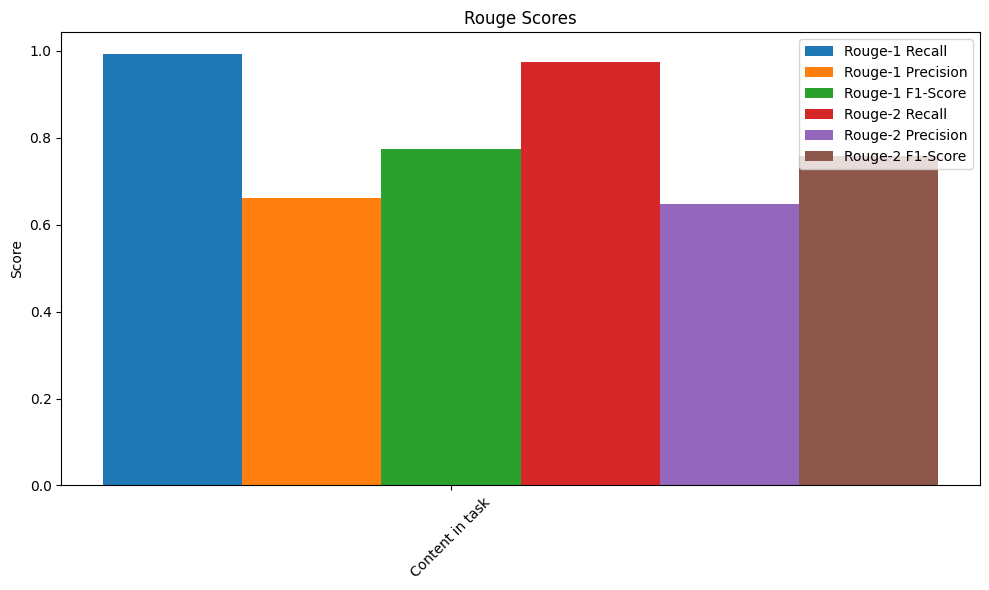

In [54]:
import matplotlib.pyplot as plt
x = np.arange(len(models_task))
width = 0.1
plt.figure(figsize=(10, 6))
plt.bar(x, rouge1_recall_task, width, label='Rouge-1 Recall')
plt.bar(x + width, rouge1_precision_task, width, label='Rouge-1 Precision')
plt.bar(x + 2 * width, rouge1_f1_task, width, label='Rouge-1 F1-Score')
plt.bar(x + 3 * width, rouge2_recall_task, width, label='Rouge-2 Recall')
plt.bar(x + 4 * width, rouge2_precision_task, width, label='Rouge-2 Precision')
plt.bar(x + 5 * width, rouge2_f1_task, width, label='Rouge-2 F1-Score')
plt.xlabel('')
plt.ylabel('Score')
plt.title('Rouge Scores')
plt.xticks(x + 2 * width, models_task, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()